In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями

In [83]:
file = '../input/brents/my_BRENT2019.csv'

In [84]:
brent = pd.read_csv(file, index_col=[0], parse_dates=[0])
brent.values[1:,:]

array([[7.689e+01, 2.010e+03, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.657e+01, 2.010e+03, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.662e+01, 2.010e+03, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.037e+01, 2.019e+03, 8.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.919e+01, 2.019e+03, 8.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.884e+01, 2.019e+03, 9.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

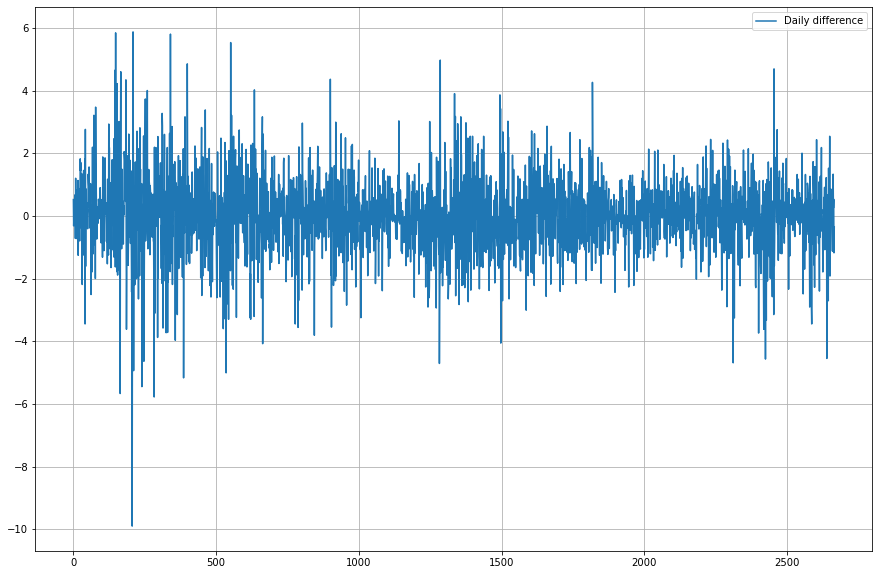

In [85]:
brent_dif = np.array(brent.values[1:,:]-brent.values[:-1,:]).astype('float32')
plt.figure(figsize = (15,10))
plt.plot(brent_dif[:,0], label = 'Daily difference')
plt.legend()
plt.grid()
plt.show()

### сделайте ее перрасчет (ресемплинг) в представление по неделям

In [86]:
brent_w = brent.resample('W').mean()

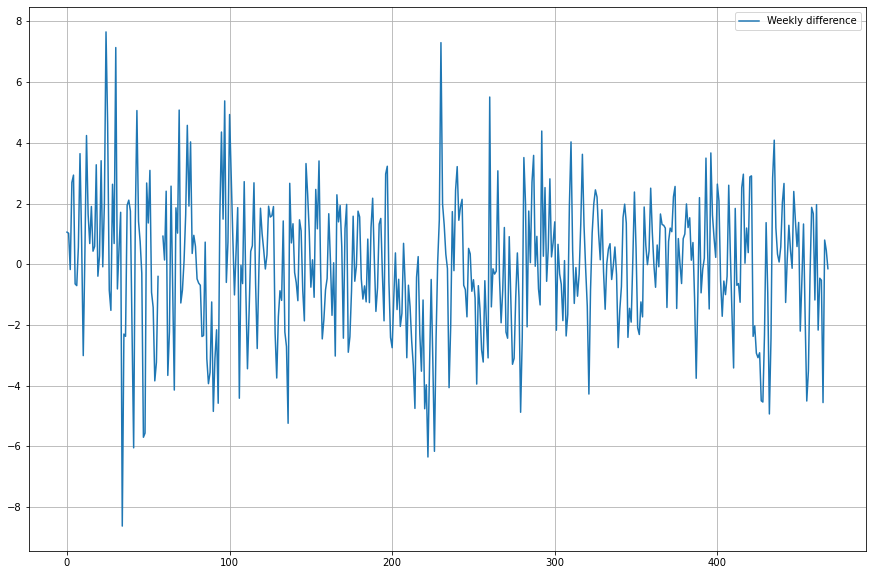

In [87]:
brent_w_differ = brent_w.values[1:,:] - brent_w.values[:-1,:] 
plt.figure(figsize=(15,10))
plt.plot(brent_w_differ[:,0], label = 'Weekly difference')
plt.legend()
plt.grid()
plt.show()


### Добавьте первые разности по стоимости доллара и евро к рублю.

In [88]:
data_usd = '../input/usd-eur/R_E01_09_2010_T01_09_2019.xlsx'
data_eur = '../input/usd-eur/RC_F01_09_2010_T01_09_2019.xlsx'
eur = pd.read_excel(data_usd, index_col = [1], parse_dates=[0])
usd = pd.read_excel(data_eur, index_col = [1], parse_dates=[0])
eur.head(), usd.head()

(            nominal     curs   cdx
 data                              
 2010-09-01        1  39.0127  Евро
 2010-09-02        1  39.1654  Евро
 2010-09-03        1  39.2901  Евро
 2010-09-04        1  39.3505  Евро
 2010-09-07        1  39.4720  Евро,
             nominal     curs         cdx
 data                                    
 2010-09-01        1  30.8669  Доллар США
 2010-09-02        1  30.8001  Доллар США
 2010-09-03        1  30.6858  Доллар США
 2010-09-04        1  30.6922  Доллар США
 2010-09-07        1  30.5771  Доллар США)

In [89]:
usd_week = usd.resample('W').mean().drop(['nominal'], axis = 1)
eur_week = eur.resample('W').mean().drop(['nominal'], axis = 1)
usd_week.iloc[:10,:], eur_week.iloc[:10,:]

(                curs
 data                
 2010-09-05  30.76125
 2010-09-12  30.79402
 2010-09-19  30.84672
 2010-09-26  30.99920
 2010-10-03  30.52764
 2010-10-10  30.07338
 2010-10-17  30.01814
 2010-10-24  30.59362
 2010-10-31  30.53094
 2010-11-07  30.77960,
                  curs
 data                 
 2010-09-05  39.204675
 2010-09-12  39.293360
 2010-09-19  39.977740
 2010-09-26  41.042640
 2010-10-03  41.351660
 2010-10-10  41.624020
 2010-10-17  41.969400
 2010-10-24  42.502060
 2010-10-31  42.460920
 2010-11-07  43.021633)

In [90]:
eur_week

,curs
data,
2010-09-05,39.204675
2010-09-12,39.293360
2010-09-19,39.977740
2010-09-26,41.042640
2010-10-03,41.351660
...,...
2019-08-04,70.831120
2019-08-11,72.880080
2019-08-18,73.223880


In [91]:
eur_week.isnull().sum(), usd_week.isnull().sum()

(curs    8
 dtype: int64,
 curs    8
 dtype: int64)

In [92]:
usd_week_dif = usd_week.values[1:,:] - usd_week.values[:-1,:].astype('float32')
eur_week_dif = eur_week.values[1:,:] - eur_week.values[:-1,:].astype('float32')

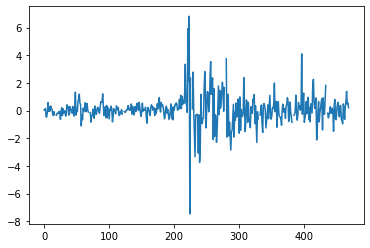

In [93]:
plt.plot(usd_week_dif)

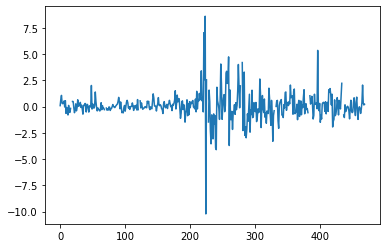

In [94]:
plt.plot(eur_week_dif)

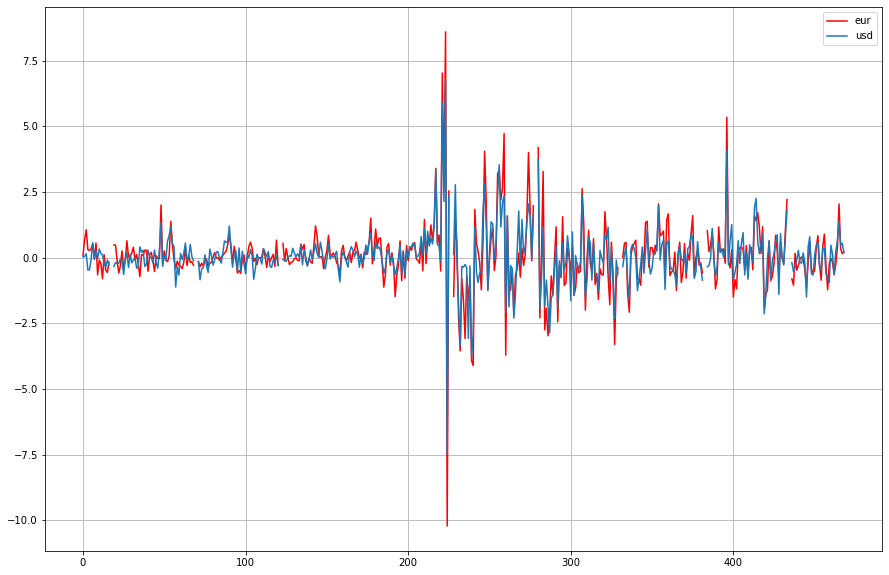

In [95]:
plt.figure(figsize=(15,10))
plt.plot(eur_week_dif, 'r', label = 'eur')
plt.plot(usd_week_dif, label = 'usd')
plt.grid()
plt.legend()
plt.show()

### Постройте модель предсказания 1-й точки от текущей (h=1).

## Для USD

In [96]:
from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings

warnings.filterwarnings("ignore") 


from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

usd_week = usd_week.dropna(axis=0) # Удалим пропуски
usd_week.isnull().sum()

scl_target=StandardScaler() 

h=1


target = usd_week["curs"].values[h:].reshape((usd_week.shape[0]-h,1))
y = scl_target.fit_transform(target)
usd_week.isnull().sum()

curs    0
dtype: int64

In [97]:
scl_x=StandardScaler() 

X = usd_week.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float32'))

In [98]:
usd_week = usd_week.dropna(axis=0)
usd_week.isnull().sum()

curs    0
dtype: int64

In [99]:
usd_week

,curs
data,
2010-09-05,30.76125
2010-09-12,30.79402
2010-09-19,30.84672
2010-09-26,30.99920
2010-10-03,30.52764
...,...
2019-08-04,63.75872
2019-08-11,65.14700
2019-08-18,65.62408


In [100]:
# сделаем функцию
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

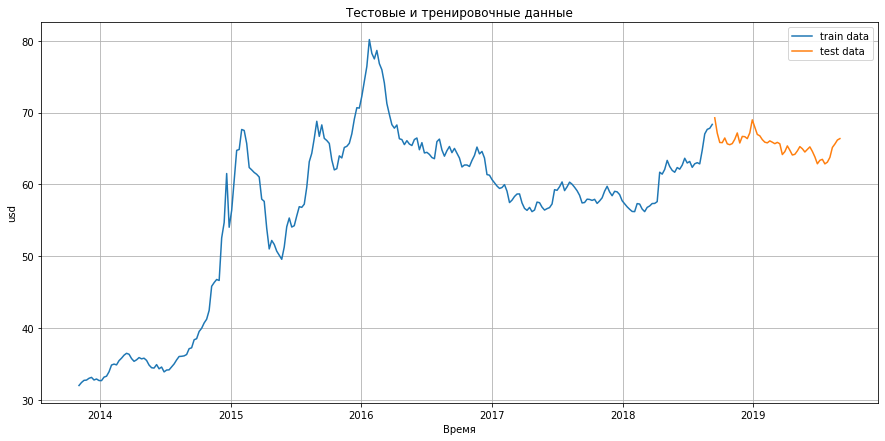

In [101]:
N_x = -300
N_split = -50

train, test = split_data( usd_week[N_x:], N_split)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('usd')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [102]:
X_train =X[N_x:N_split,:]
y_train =y[N_x:N_split,0]
X_test =X[N_split:,:]
y_test =y[N_split:,0]

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [104]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()

In [105]:
model_l.fit( X_train, y_train ) # 
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(max_depth=5, n_estimators=1000, random_state=10)

In [106]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [108]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.011552658077391299 
ошибка mae  :   0.08461737062783432 
оценка R2 :   -0.5930124290370988


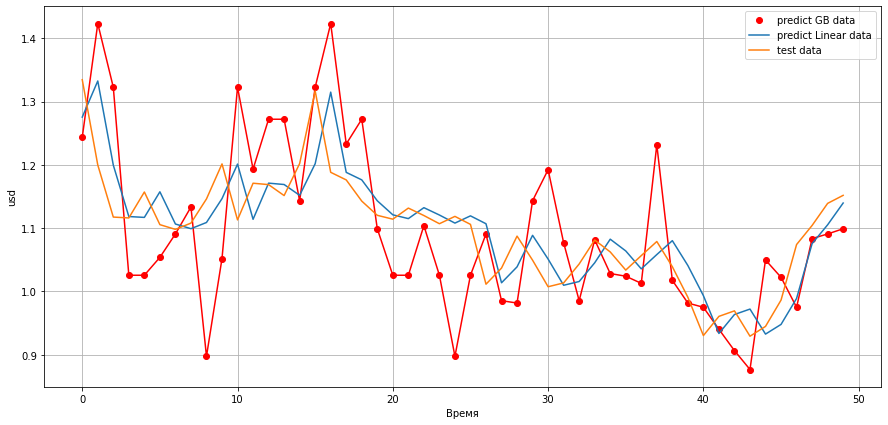

In [109]:

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('usd')
plt.plot(y_test_pred_g[:100],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:100],'r' )
plt.plot(y_test_pred_l[:100], label='predict Linear data' )
plt.plot(y_test[:100], label='test data')
plt.grid()
plt.legend()
plt.show()


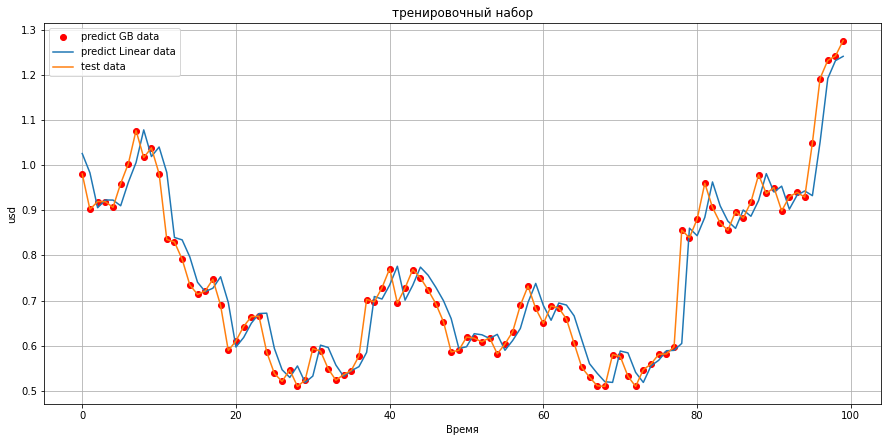

In [110]:
plt.figure( figsize=( 15, 7 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('usd')
plt.plot(y_pred_g[-100:],'or', label='predict GB data' )
plt.plot(y_pred_l[-100:], label='predict Linear data' )
plt.plot(y_train[-100:], label='test data')
plt.grid()
plt.legend()
plt.show()

In [111]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_g_best = GradientBoostingRegressor(max_depth=3,  n_estimators=300)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   1.6027994432937822 %


In [112]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -1.733 (std: 4.337)
Parameters: {'n_estimators': 300, 'max_depth': 3}

Model with rank: 2
Mean validation score: -1.737 (std: 4.243)
Parameters: {'n_estimators': 400, 'max_depth': 4}

Model with rank: 3
Mean validation score: -1.739 (std: 4.227)
Parameters: {'n_estimators': 500, 'max_depth': 4}



## То же самое для евро

In [113]:
from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings

warnings.filterwarnings("ignore") 


from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

eur_week = eur_week.dropna(axis=0)


scl_target1=StandardScaler() 


h=1


target1 = eur_week["curs"].values[h:].reshape((eur_week.shape[0]-h,1))
y1 = scl_target1.fit_transform(target1)
eur_week.isnull().sum()

curs    0
dtype: int64

In [114]:
scl_x=StandardScaler() 

X1 = eur_week.iloc[:-h,:].values
X1 = scl_x.fit_transform(X.astype('float32'))

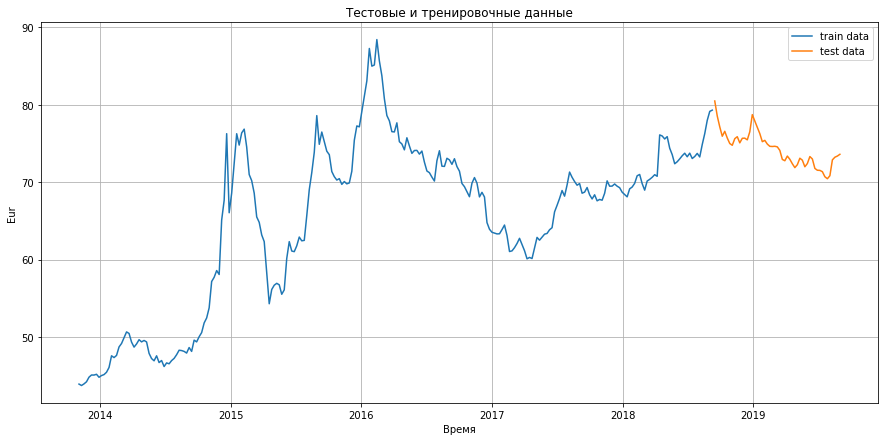

In [115]:
N_x = -300
N_split = -50

train, test = split_data( eur_week[N_x:], N_split)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Eur')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [116]:
X_train1 =X1[N_x:N_split,:]
y_train1 =y1[N_x:N_split,0]
X_test1 =X1[N_split:,:]
y_test1 =y1[N_split:,0]

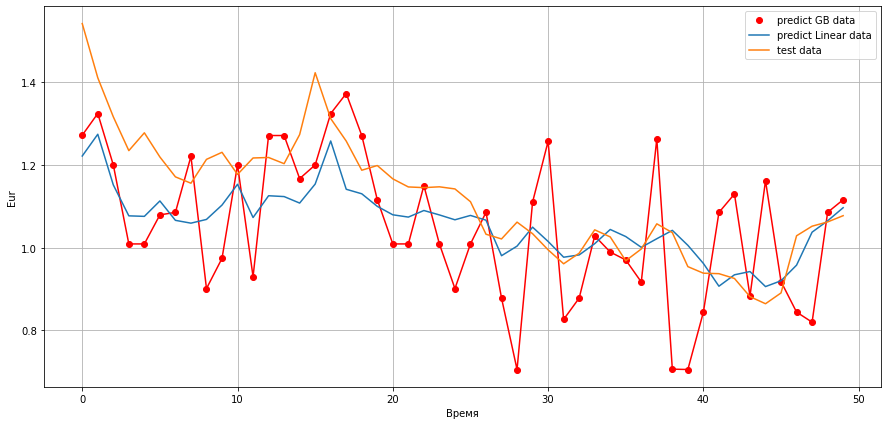

In [117]:
model_g1 = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l1 = LinearRegression()
model_l1.fit( X_train1, y_train1 ) # 
model_g1.fit( X_train1, y_train1 ) 
y_pred_g1 = model_g.predict(X_train1)
y_pred_l1= model_l.predict(X_train1)

y_test_pred_g1 = model_g1.predict(X_test1)
y_test_pred_l1= model_l1.predict(X_test1)


plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Eur')
plt.plot(y_test_pred_g1[:100],'or', label='predict GB data' )
plt.plot(y_test_pred_g1[:100],'r' )
plt.plot(y_test_pred_l1[:100], label='predict Linear data' )
plt.plot(y_test1[:100], label='test data')
plt.grid()
plt.legend()
plt.show()

In [118]:
er_s1 = mean_squared_error(y_true=y_test1, y_pred=y_test_pred_g1) 
er_a1 = mean_absolute_error(y_true=y_test1, y_pred=y_test_pred_g1) 
er_r21 = r2_score(y_true=y_test1, y_pred=y_test_pred_g1)

print('ошибка mse :  ', er_s1,'\nошибка mae  :  ', er_a1,'\nоценка R2 :  ', er_r21)

ошибка mse :   0.028887373388359897 
ошибка mae  :   0.1390729195027537 
оценка R2 :   -0.36031258805296895


In [119]:
model_g_best1 = GradientBoostingRegressor(max_depth=3,  n_estimators=300)
model_g_best1.fit( X_train1, y_train1 ) 
y_test_pred_g1 = model_g_best.predict(X_test1)

er_g = mean_absolute_percentage_error(y_true=scl_target1.inverse_transform( y_test1),y_pred = scl_target1.inverse_transform( y_test_pred_g1))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   1.553880827483392 %


In [120]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -1.716 (std: 4.342)
Parameters: {'n_estimators': 100, 'max_depth': 5}

Model with rank: 2
Mean validation score: -1.733 (std: 4.349)
Parameters: {'n_estimators': 200, 'max_depth': 4}

Model with rank: 3
Mean validation score: -1.739 (std: 4.267)
Parameters: {'n_estimators': 200, 'max_depth': 5}



Модели в большинстве случае ошибаются и в направлении и по ответам (или статистически 50*50). Надо попробовать поискать можно ли найти разделить данные на стационарные и нестационарные. А также поискать коинтегрированные пары. Кроме того, вероятнее всего можно посмотреть закономерность не только на недельном ресемплинге усредняя, но и по закрытию недели (последняя цена пятницы).